# Deconvolution

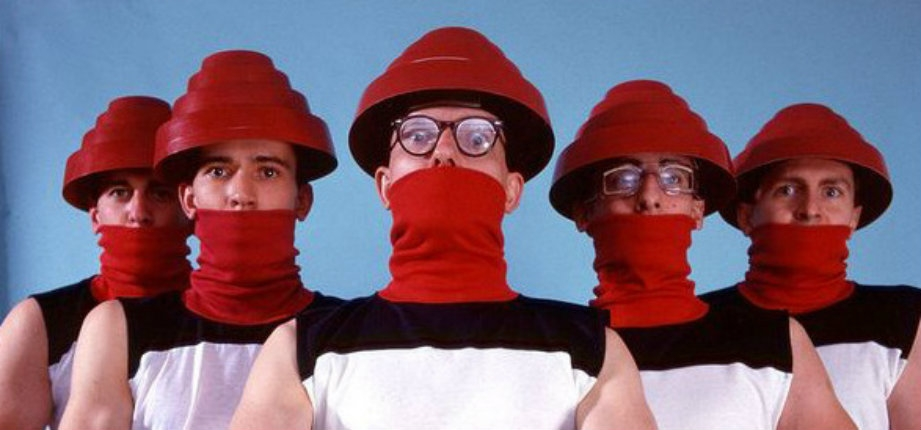

https://towardsdatascience.com/understand-transposed-convolutions-and-build-your-own-transposed-convolution-layer-from-scratch-4f5d97b2967

https://arxiv.org/pdf/1603.07285.pdf

https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

todo:
- AR Punks update and categorical variables
- VAR Punks categorical
- GAN PUnks
- C64 Punks
- MIDI punks
    

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
device = "/device:CPU:0"
if len(tf.config.list_physical_devices('GPU')) >= 1:
       device = "/GPU:0"
device

2022-01-29 19:49:53.215132: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-29 19:49:53.467575: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-29 19:49:53.467825: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


'/GPU:0'

In [3]:
import sys
sys.path.append('..')
sys.path.append('/home/tnn1t1s/art/cpunks-10k')
import matplotlib.pyplot as plt
import cpunks.cpunks10k as cpunks10k
%matplotlib inline

In [4]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Conv2DTranspose


In [5]:
cp = cpunks10k.cpunks10k()
(X_train, Y_train), (X_test, Y_test), (labels) = cp.load_data()

In [6]:
# Model configuration
batch_size = 1000
num_epochs = 25
num_classes = 10
verbosity = 1
validation_split = 0.1

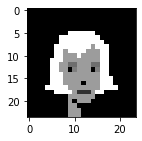

In [7]:
cmap = plt.get_cmap('gray')
def rgb2gray(rgb):
    weights = [0.2989, 0.5870, 0.1140]
    return np.dot(rgb[...,:3], weights)

X_train_g = np.array([rgb2gray(img) for img in X_train])
X_test_g = np.array([rgb2gray(img) for img in X_test])
fig = plt.figure(figsize=(2,2))
plt.imshow(X_train_g[0], cmap=cmap)
plt.show()

In [8]:
X_train_g = X_train_g.reshape(9000,24,24,1)
X_test_g = X_test_g.reshape(1000,24,24,1)

In [31]:
#input_shape = (24, 24, 1)
input_shape = (24, 24, 4)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2DTranspose(8, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2DTranspose(16, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2DTranspose(32, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2D(4, kernel_size=(3, 3), activation='sigmoid', padding='same'))

In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 22, 22, 32)        1184      
                                                                 
 conv2d_17 (Conv2D)          (None, 20, 20, 16)        4624      
                                                                 
 conv2d_18 (Conv2D)          (None, 18, 18, 8)         1160      
                                                                 
 conv2d_transpose_12 (Conv2D  (None, 20, 20, 8)        584       
 Transpose)                                                      
                                                                 
 conv2d_transpose_13 (Conv2D  (None, 22, 22, 16)       1168      
 Transpose)                                                      
                                                                 
 conv2d_transpose_14 (Conv2D  (None, 24, 24, 32)      

In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [30]:
'''
model.fit(X_train_g, X_train_g,
                epochs=10,
                batch_size=batch_size,
                validation_split=validation_split)
'''
1

1

In [42]:
model.fit(X_train, X_train, epochs=200, batch_size=batch_size, validation_split=validation_split)

Epoch 1/200
9/9 [==============================] - 2s 232ms/step - loss: 0.0930 - val_loss: 0.0929
Epoch 2/200
9/9 [==============================] - 2s 226ms/step - loss: 0.0932 - val_loss: 0.0925
Epoch 3/200
9/9 [==============================] - 2s 226ms/step - loss: 0.0929 - val_loss: 0.0924
Epoch 4/200
9/9 [==============================] - 2s 228ms/step - loss: 0.0928 - val_loss: 0.0924
Epoch 5/200
9/9 [==============================] - 2s 227ms/step - loss: 0.0927 - val_loss: 0.0923
Epoch 6/200
9/9 [==============================] - 2s 228ms/step - loss: 0.0927 - val_loss: 0.0922
Epoch 7/200
9/9 [==============================] - 2s 228ms/step - loss: 0.0929 - val_loss: 0.0933
Epoch 8/200
9/9 [==============================] - 2s 228ms/step - loss: 0.0932 - val_loss: 0.0922
Epoch 9/200
9/9 [==============================] - 2s 230ms/step - loss: 0.0927 - val_loss: 0.0922
Epoch 10/200
9/9 [==============================] - 2s 229ms/step - loss: 0.0926 - val_loss: 0.0921
Epoch 11/

9/9 [==============================] - 2s 228ms/step - loss: 0.0915 - val_loss: 0.0911
Epoch 84/200
9/9 [==============================] - 2s 228ms/step - loss: 0.0914 - val_loss: 0.0907
Epoch 85/200
9/9 [==============================] - 2s 229ms/step - loss: 0.0912 - val_loss: 0.0907
Epoch 86/200
9/9 [==============================] - 2s 228ms/step - loss: 0.0911 - val_loss: 0.0906
Epoch 87/200
9/9 [==============================] - 2s 229ms/step - loss: 0.0911 - val_loss: 0.0906
Epoch 88/200
9/9 [==============================] - 2s 227ms/step - loss: 0.0911 - val_loss: 0.0906
Epoch 89/200
9/9 [==============================] - 2s 228ms/step - loss: 0.0911 - val_loss: 0.0906
Epoch 90/200
9/9 [==============================] - 2s 229ms/step - loss: 0.0911 - val_loss: 0.0906
Epoch 91/200
9/9 [==============================] - 2s 228ms/step - loss: 0.0911 - val_loss: 0.0906
Epoch 92/200
9/9 [==============================] - 2s 229ms/step - loss: 0.0911 - val_loss: 0.0906
Epoch 93/200


9/9 [==============================] - 2s 229ms/step - loss: 0.0906 - val_loss: 0.0901
Epoch 165/200
9/9 [==============================] - 2s 226ms/step - loss: 0.0906 - val_loss: 0.0902
Epoch 166/200
9/9 [==============================] - 2s 233ms/step - loss: 0.0907 - val_loss: 0.0901
Epoch 167/200
9/9 [==============================] - 2s 232ms/step - loss: 0.0906 - val_loss: 0.0903
Epoch 168/200
9/9 [==============================] - 2s 232ms/step - loss: 0.0909 - val_loss: 0.0901
Epoch 169/200
9/9 [==============================] - 2s 229ms/step - loss: 0.0906 - val_loss: 0.0901
Epoch 170/200
9/9 [==============================] - 2s 229ms/step - loss: 0.0906 - val_loss: 0.0901
Epoch 171/200
9/9 [==============================] - 2s 228ms/step - loss: 0.0906 - val_loss: 0.0901
Epoch 172/200
9/9 [==============================] - 2s 227ms/step - loss: 0.0906 - val_loss: 0.0901
Epoch 173/200
9/9 [==============================] - 2s 228ms/step - loss: 0.0906 - val_loss: 0.0902
Epoc

In [53]:
devolved_in = X_test[50:55]
devolved = model.predict(devolved_in)

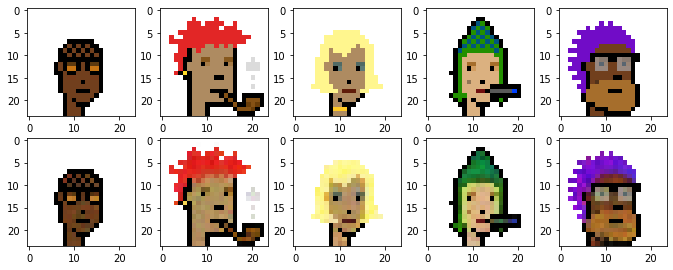

In [54]:
fig = plt.figure(figsize=(7, 3))
n_rows = 2
n_cols = 5
for i in range(0,n_cols):
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    ax.imshow(devolved_in[i], cmap=cmap)

    ax = fig.add_subplot(n_rows, n_cols, i+1+n_cols)
    ax.imshow(devolved[i], cmap=cmap)

plt.subplots_adjust(bottom=-0.2, right=1.4, top=0.9)